<a href="https://colab.research.google.com/github/f78rocha/kaggle_churn_challenge_2020/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de testes para o Kaggle Churn Challenge 2020

https://www.kaggle.com/c/labdata-churn-challenge-2020/overview

## Problema:
O objetivo desta análise consiste em prever a probabilidade de churn dos clientes de uma empresa de telecomunicações, isto é, a probabilidade de o cliente deixar de ser cliente.

Importação de bibliotecas e configuração do ambiente

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [34]:

warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 72)

In [3]:
!pip install pycaret

     |████████████████████████████████| 256kB 4.6MB/s 
     |████████████████████████████████| 13.9MB 316kB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 1.6MB 45.5MB/s 
     |████████████████████████████████| 266kB 48.6MB/s 
     |████████████████████████████████| 148.9MB 78kB/s 
     |████████████████████████████████| 1.8MB 48.8MB/s 
     |████████████████████████████████| 174kB 47.6MB/s 
     |████████████████████████████████| 276kB 47.7MB/s 
     |████████████████████████████████| 6.8MB 37.6MB/s 
     |████████████████████████████████| 66.2MB 64kB/s 
     |████████████████████████████████| 6.0MB 28.1MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 327kB 39.7MB/s 
     |████████████████████████████████| 153kB 30.9MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 163kB 49.1MB/s 
     |████████████████████████████████| 1.1MB 46.2MB/s

In [3]:
from pycaret.classification import *

In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importação dos dados

In [6]:
dados = pd.read_csv('https://raw.githubusercontent.com/f78rocha/kaggle_churn_challenge_2020/main/train.csv',sep=',')

In [7]:
dados = dados.rename(columns={
    'id':'id',
    'gender':'Genero',
    'SeniorCitizen':'Idoso',
    'Partner':'TemParceiro',
    'Dependents':'TemDependentes',
    'tenure':'MesesNaCompanhia',
    'PhoneService':'TemTelefone',
    'MultipleLines':'MaisLinhas',
    'InternetService':'TemInternet',
    'OnlineSecurity':'ServicoSegurancaOnline',
    'OnlineBackup':'ServicoBackupOnline',
    'DeviceProtection':'ServicoProtecaoOnline',
    'TechSupport':'ServicoSuporteOnline',
    'StreamingTV':'ServicoTV',
    'StreamingMovies':'ServicoPctFilmes',
    'Contract':'Contrato',
    'PaperlessBilling':'ContaOnline',
    'PaymentMethod':'MetodoPagamento',
    'MonthlyCharges':'CobrancaMensal',
    'TotalCharges':'CobrancaTotal',
    'Churn':'Churn'
})

# Análise Exploratória de Dados (EDA)

In [8]:
# Cabeçalho
dados.head()

,id,Genero,Idoso,TemParceiro,TemDependentes,MesesNaCompanhia,TemTelefone,MaisLinhas,TemInternet,ServicoSegurancaOnline,ServicoBackupOnline,ServicoProtecaoOnline,ServicoSuporteOnline,ServicoTV,ServicoPctFilmes,Contrato,ContaOnline,MetodoPagamento,CobrancaMensal,CobrancaTotal,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [9]:
dados.set_index('id', inplace=True)
dados.head()

,Genero,Idoso,TemParceiro,TemDependentes,MesesNaCompanhia,TemTelefone,MaisLinhas,TemInternet,ServicoSegurancaOnline,ServicoBackupOnline,ServicoProtecaoOnline,ServicoSuporteOnline,ServicoTV,ServicoPctFilmes,Contrato,ContaOnline,MetodoPagamento,CobrancaMensal,CobrancaTotal,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [10]:
quantitativas = dados[['MesesNaCompanhia','CobrancaMensal','CobrancaTotal']]
categoricas = dados.drop(columns=['MesesNaCompanhia','CobrancaMensal','CobrancaTotal'])
#target = dados['Churn']

In [11]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesesNaCompanhia  5173 non-null   float64
 1   CobrancaMensal    5634 non-null   float64
 2   CobrancaTotal     5634 non-null   object 
dtypes: float64(2), object(1)
memory usage: 176.1+ KB


In [12]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genero                  5634 non-null   object
 1   Idoso                   5634 non-null   int64 
 2   TemParceiro             5634 non-null   object
 3   TemDependentes          5416 non-null   object
 4   TemTelefone             5634 non-null   object
 5   MaisLinhas              5634 non-null   object
 6   TemInternet             5634 non-null   object
 7   ServicoSegurancaOnline  5634 non-null   object
 8   ServicoBackupOnline     5634 non-null   object
 9   ServicoProtecaoOnline   5634 non-null   object
 10  ServicoSuporteOnline    5634 non-null   object
 11  ServicoTV               5634 non-null   object
 12  ServicoPctFilmes        5634 non-null   object
 13  Contrato                5634 non-null   object
 14  ContaOnline             5634 non-null   object
 15  Me

## Pre-processing

### Pré-processamento das variáveis quantitativas

In [13]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesesNaCompanhia  5173 non-null   float64
 1   CobrancaMensal    5634 non-null   float64
 2   CobrancaTotal     5634 non-null   object 
dtypes: float64(2), object(1)
memory usage: 176.1+ KB


A coluna CobrancaTotal está no formato object, embora seja numérica. Para convertê-la para o formato correto:

In [14]:
quantitativas['CobrancaTotal'] = pd.to_numeric(quantitativas['CobrancaTotal'], errors = 'coerce')
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesesNaCompanhia  5173 non-null   float64
 1   CobrancaMensal    5634 non-null   float64
 2   CobrancaTotal     5626 non-null   float64
dtypes: float64(3)
memory usage: 176.1 KB


In [15]:
# Verificando missing values:
quantitativas.isnull().sum()

MesesNaCompanhia    461
CobrancaMensal        0
CobrancaTotal         8
dtype: int64

In [16]:
# Verificando valores zerados em cada coluna:
quantitativas[quantitativas['MesesNaCompanhia'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
id,,,
6755,0.0,61.90,NaN
5219,0.0,19.70,NaN
6671,0.0,73.35,NaN
937,0.0,80.85,NaN
3827,0.0,25.35,NaN
1083,0.0,25.75,NaN
3332,0.0,19.85,NaN
1341,0.0,56.05,NaN


In [17]:
quantitativas[quantitativas['CobrancaMensal'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
id,,,


In [18]:
quantitativas[quantitativas['CobrancaTotal'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
id,,,


Conclusão: Há 118 NaNs na coluna MesesNaCompanhia e 3 NaNs na coluna CobrancaTotal. Além disso, os mesmos registros com  NaNs na coluna CobrancaTotal estão com zero em MesesNaCompanhia. Assumimos que os primeiros referem-se a clientes que estão na companhia a menos de um mês. Assim, os NaNs de CobrancaTotal serão imputados pela CobrancaMensal respectiva:

In [19]:
# Criar coluna 'CobrancaTotal2':
quantitativas['CobrancaTotal2'] = quantitativas['CobrancaTotal']


In [20]:
quantitativas[quantitativas['CobrancaTotal2'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
id,,,,
6755,0.0,61.90,NaN,NaN
5219,0.0,19.70,NaN,NaN
6671,0.0,73.35,NaN,NaN
937,0.0,80.85,NaN,NaN
3827,0.0,25.35,NaN,NaN
1083,0.0,25.75,NaN,NaN
3332,0.0,19.85,NaN,NaN
1341,0.0,56.05,NaN,NaN


In [21]:
# Preenche os NaNs de CobrancaTotal2 pelo valor respectivo de CobrancaMensal:
quantitativas['CobrancaTotal2'].fillna(quantitativas[quantitativas['CobrancaTotal'].isna()]['CobrancaMensal'], inplace = True)

In [22]:
# Verifica que os NaNs de CobrancaTotal foram substituídos pelos valores respectivos de CobrancaMensal na coluna CobrancaTotal2:
quantitativas[quantitativas['CobrancaTotal'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
id,,,,
6755,0.0,61.90,NaN,61.90
5219,0.0,19.70,NaN,19.70
6671,0.0,73.35,NaN,73.35
937,0.0,80.85,NaN,80.85
3827,0.0,25.35,NaN,25.35
1083,0.0,25.75,NaN,25.75
3332,0.0,19.85,NaN,19.85
1341,0.0,56.05,NaN,56.05


In [23]:
# Novo describe:
quantitativas.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
count,5173.000000,5634.000000,5626.000000,5634.000000
mean,32.332882,64.626438,2273.513811,2270.349929
std,24.463607,30.021806,2258.383946,2258.339275
min,0.000000,18.250000,18.800000,18.800000
25%,9.000000,35.462500,401.587500,399.300000
50%,29.000000,70.250000,1396.125000,1392.925000
75%,55.000000,89.800000,3764.287500,3758.400000
max,72.000000,118.750000,8684.800000,8684.800000


Tratamento dos missing values da coluna MesesNaCompanhia:

In [24]:
# Ao dividir a cobrança total pela mensal, temos a quantidade de meses aproximados, incluída na coluna CobrancaTotalPorMensal:
quantitativas['CobrancaTotalPorMensal'] = quantitativas['CobrancaTotal2']/quantitativas['CobrancaMensal']

In [25]:
# A diferença entre a coluna CobrancaTotalPorMensal e a MesesNaCompanhia é relativamente pequena, conforme describe e coluna Erro_Meses:
quantitativas['Erro_Meses'] = (quantitativas['CobrancaTotalPorMensal'] - quantitativas['MesesNaCompanhia'])/quantitativas['MesesNaCompanhia']
quantitativas[quantitativas['MesesNaCompanhia'].notna()].describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses
count,5173.000000,5173.000000,5165.000000,5173.000000,5173.000000,5173.000000
mean,32.332882,64.664827,2278.957512,2275.503257,32.348197,inf
std,24.463607,30.048838,2260.015889,2259.972832,24.503608,NaN
min,0.000000,18.250000,18.800000,18.800000,1.000000,-0.310644
25%,9.000000,35.450000,403.150000,401.300000,8.814815,-0.020374
50%,29.000000,70.300000,1398.600000,1396.250000,28.441142,0.000000
75%,55.000000,89.850000,3770.000000,3766.200000,54.827714,0.019874
max,72.000000,118.750000,8684.800000,8684.800000,79.341772,inf


In [26]:
# Observe a coluna Erro_Meses, criada na célula anterior:
quantitativas[quantitativas['MesesNaCompanhia'].notna()].sum()

MesesNaCompanhia          1.672580e+05
CobrancaMensal            3.345112e+05
CobrancaTotal             1.177082e+07
CobrancaTotal2            1.177118e+07
CobrancaTotalPorMensal    1.673372e+05
Erro_Meses                         inf
dtype: float64

In [27]:
# Assim, criamos uma coluna para registrar os MesesNaCompanhia :

quantitativas['MesesNaCompanhia2'] = quantitativas['MesesNaCompanhia']
quantitativas

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses,MesesNaCompanhia2
id,,,,,,,
4030,56.0,45.05,2560.10,2560.10,56.827969,0.014785,56.0
6731,NaN,19.65,332.65,332.65,16.928753,NaN,NaN
6479,60.0,110.80,6640.70,6640.70,59.934116,-0.001098,60.0
6861,37.0,101.90,3545.35,3545.35,34.792444,-0.059664,37.0
3266,29.0,70.75,1974.80,1974.80,27.912367,-0.037505,29.0
...,...,...,...,...,...,...,...
6684,43.0,44.15,1931.30,1931.30,43.744054,0.017304,43.0
604,NaN,108.65,4903.20,4903.20,45.128394,NaN,NaN
4803,28.0,54.65,1517.50,1517.50,27.767612,-0.008300,28.0


In [28]:
# Em seguida, preenchemos os NaNs da coluna criada com a CobrancaTotalPorMensal
quantitativas['MesesNaCompanhia2'].fillna(quantitativas['CobrancaTotalPorMensal'], inplace = True)

In [29]:
quantitativas[quantitativas['MesesNaCompanhia'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses,MesesNaCompanhia2
id,,,,,,,
6731,NaN,19.65,332.65,332.65,16.928753,NaN,16.928753
333,NaN,94.90,4422.95,4422.95,46.606428,NaN,46.606428
956,NaN,44.70,44.70,44.70,1.000000,NaN,1.000000
3331,NaN,97.80,4913.30,4913.30,50.238241,NaN,50.238241
832,NaN,25.05,963.95,963.95,38.481038,NaN,38.481038
5777,NaN,82.30,5980.55,5980.55,72.667679,NaN,72.667679
1000,NaN,70.30,132.40,132.40,1.883357,NaN,1.883357
2199,NaN,61.95,1070.70,1070.70,17.283293,NaN,17.283293
5851,NaN,71.30,1389.20,1389.20,19.483871,NaN,19.483871


In [30]:
# Pegamos as colunas que interessam e a renomeamos
quantitativas = quantitativas[['MesesNaCompanhia2', 'CobrancaMensal', 'CobrancaTotal2']].copy()
quantitativas.columns = ['MesesNaCompanhia', 'CobrancaMensal', 'CobrancaTotal']


In [31]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesesNaCompanhia  5634 non-null   float64
 1   CobrancaMensal    5634 non-null   float64
 2   CobrancaTotal     5634 non-null   float64
dtypes: float64(3)
memory usage: 176.1 KB


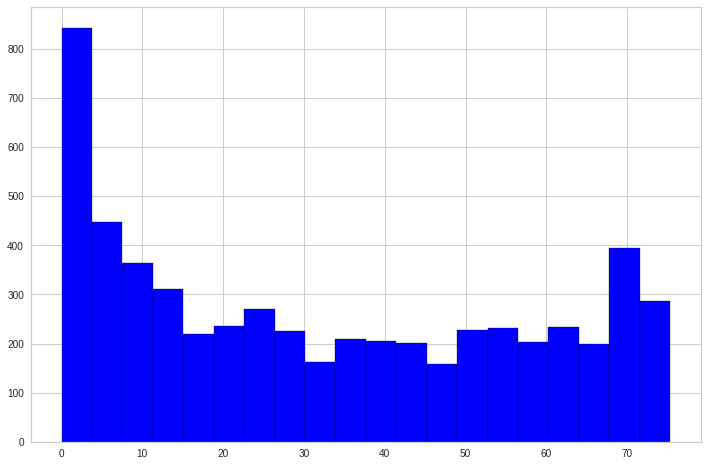

In [80]:
# Verificando o formato da distribuição:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['MesesNaCompanhia'], color = 'blue', edgecolor = 'black', bins = 20);

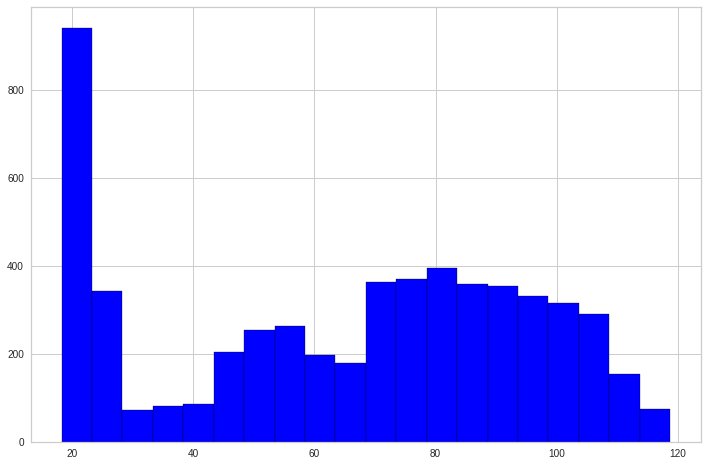

In [81]:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['CobrancaMensal'], color = 'blue', edgecolor = 'black', bins = 20);

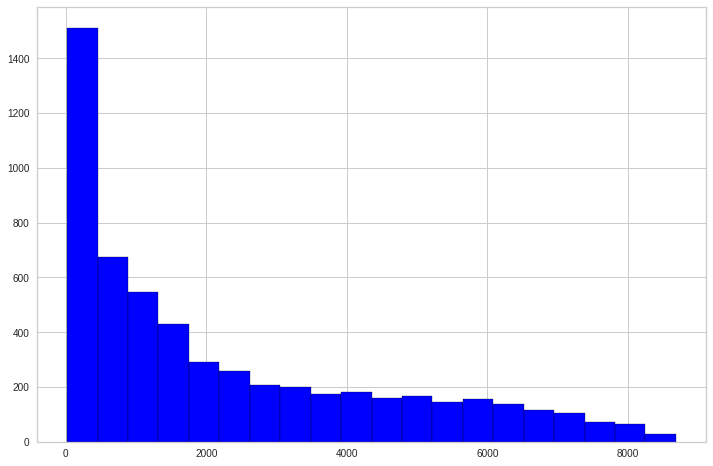

In [82]:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['CobrancaTotal'], color = 'blue', edgecolor = 'black', bins = 20);

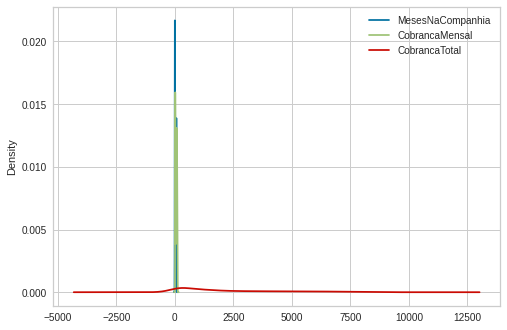

In [83]:
quantitativas.plot(kind = 'kde');

In [39]:
# 1a Transformação: StandardScaler
from sklearn.preprocessing import StandardScaler

quant_scale = StandardScaler().fit_transform(quantitativas)

In [40]:
quant_scale = pd.DataFrame(quant_scale, columns= quantitativas.columns)
quant_scale.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.32,-1.54,-1.00
25%,-0.95,-0.97,-0.83
50%,-0.14,0.19,-0.39
75%,0.92,0.84,0.66
max,1.75,1.80,2.84


In [41]:
# 2a Transformação: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

quant_minmax = MinMaxScaler().fit_transform(quantitativas)
quant_minmax = pd.DataFrame(quant_minmax, columns= quantitativas.columns)
quant_minmax.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,0.43,0.46,0.26
std,0.33,0.30,0.26
min,0.00,0.00,0.00
25%,0.12,0.17,0.04
50%,0.38,0.52,0.16
75%,0.73,0.71,0.43
max,1.00,1.00,1.00


In [42]:
# 3a Transformação: RobustScaler
from sklearn.preprocessing import RobustScaler

quant_robust = RobustScaler().fit_transform(quantitativas)
quant_robust = pd.DataFrame(quant_minmax, columns= quantitativas.columns)
quant_robust.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,0.43,0.46,0.26
std,0.33,0.30,0.26
min,0.00,0.00,0.00
25%,0.12,0.17,0.04
50%,0.38,0.52,0.16
75%,0.73,0.71,0.43
max,1.00,1.00,1.00


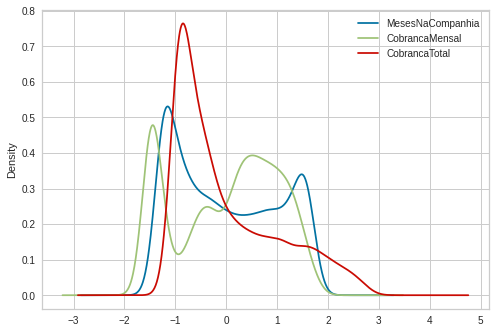

In [84]:
quant_scale.plot(kind= 'kde');

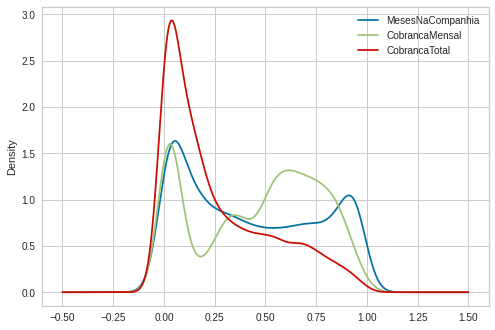

In [85]:
quant_minmax.plot(kind='kde');

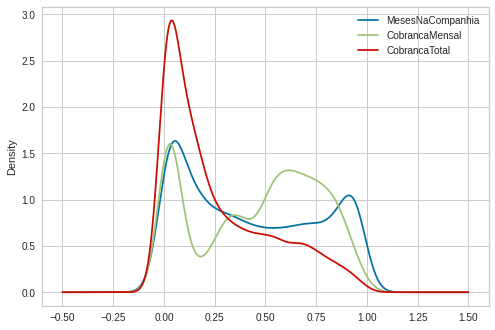

In [86]:
quant_robust.plot(kind = 'kde');

## Tratamento das variáveis categórias

In [46]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genero                  5634 non-null   object
 1   Idoso                   5634 non-null   int64 
 2   TemParceiro             5634 non-null   object
 3   TemDependentes          5416 non-null   object
 4   TemTelefone             5634 non-null   object
 5   MaisLinhas              5634 non-null   object
 6   TemInternet             5634 non-null   object
 7   ServicoSegurancaOnline  5634 non-null   object
 8   ServicoBackupOnline     5634 non-null   object
 9   ServicoProtecaoOnline   5634 non-null   object
 10  ServicoSuporteOnline    5634 non-null   object
 11  ServicoTV               5634 non-null   object
 12  ServicoPctFilmes        5634 non-null   object
 13  Contrato                5634 non-null   object
 14  ContaOnline             5634 non-null   object
 15  Me

Tratamento de valores faltantes

In [47]:
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
dtype: int64

In [48]:
# Criar coluna TemDependentes2 e preencher os NaNs pela moda
categoricas['TemDependentes2'] = categoricas['TemDependentes']

In [49]:
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2           218
dtype: int64

In [50]:
categoricas['TemDependentes2'].mode()

0    No
dtype: object

In [51]:
categoricas['TemDependentes2'].fillna(value = 'No', inplace = True)
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2             0
dtype: int64

In [52]:
# Mesmo procedimento para a variável MetodoPagamento
# Criar coluna TemDependentes2 e preencher os NaNs pela moda
categoricas['MetodoPagamento2'] = categoricas['MetodoPagamento']
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2             0
MetodoPagamento2           99
dtype: int64

In [53]:
categoricas['MetodoPagamento2'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: MetodoPagamento2, dtype: int64

In [54]:
categoricas['MetodoPagamento2'].fillna(value = 'Electronic check', inplace = True)
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2             0
MetodoPagamento2            0
dtype: int64

In [55]:
# Apaga as colunas TemDependentes e MetodoPagamento originais e renomeia TemDependentes2 e MetodoPagamento2:
categoricas = categoricas.drop(columns = ['MetodoPagamento', 'TemDependentes'])


In [56]:
categoricas.rename(columns = {'TemDependentes2': 'TemDependentes', 
                              'MetodoPagamento2': 'MetodoPagamento'}, inplace=True)

In [57]:
categoricas['Idoso'] = categoricas['Idoso'].astype(str)
categoricas['Churn'] = categoricas['Churn'].astype(str)

In [58]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genero                  5634 non-null   object
 1   Idoso                   5634 non-null   object
 2   TemParceiro             5634 non-null   object
 3   TemTelefone             5634 non-null   object
 4   MaisLinhas              5634 non-null   object
 5   TemInternet             5634 non-null   object
 6   ServicoSegurancaOnline  5634 non-null   object
 7   ServicoBackupOnline     5634 non-null   object
 8   ServicoProtecaoOnline   5634 non-null   object
 9   ServicoSuporteOnline    5634 non-null   object
 10  ServicoTV               5634 non-null   object
 11  ServicoPctFilmes        5634 non-null   object
 12  Contrato                5634 non-null   object
 13  ContaOnline             5634 non-null   object
 14  Churn                   5634 non-null   object
 15  Te

In [59]:
# Cria variáveis dummies
dummies = pd.get_dummies(categoricas, drop_first= True)
dummies.head().T

id,4030,6731,6479,6861,3266
Genero_Male,0,1,0,0,1
Idoso_1,0,0,0,0,0
TemParceiro_Yes,0,1,1,0,1
TemTelefone_Yes,0,1,1,1,1
MaisLinhas_No phone service,1,0,0,0,0
MaisLinhas_Yes,0,0,1,1,0
TemInternet_Fiber optic,0,0,1,1,1
TemInternet_No,0,1,0,0,0
ServicoSegurancaOnline_No internet service,0,1,0,0,0
ServicoSegurancaOnline_Yes,1,0,0,0,0


In [60]:
dummies.rename(columns={'Churn_1': 'Churn'}, inplace= True)

## Criação dos datasets X e y

In [61]:
dados = pd.concat([categoricas,quantitativas], axis =1)

In [62]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genero                  5634 non-null   object 
 1   Idoso                   5634 non-null   object 
 2   TemParceiro             5634 non-null   object 
 3   TemTelefone             5634 non-null   object 
 4   MaisLinhas              5634 non-null   object 
 5   TemInternet             5634 non-null   object 
 6   ServicoSegurancaOnline  5634 non-null   object 
 7   ServicoBackupOnline     5634 non-null   object 
 8   ServicoProtecaoOnline   5634 non-null   object 
 9   ServicoSuporteOnline    5634 non-null   object 
 10  ServicoTV               5634 non-null   object 
 11  ServicoPctFilmes        5634 non-null   object 
 12  Contrato                5634 non-null   object 
 13  ContaOnline             5634 non-null   object 
 14  Churn                   5634 non-null 

In [63]:
data = dados.sample(frac = 0.95, random_state = 786)
data_unseen = dados.drop(data.index)

In [64]:
print(data.shape)
print(data_unseen.shape)

(5352, 20)
(282, 20)


In [65]:
data.select_dtypes('object').columns

Index(['Genero', 'Idoso', 'TemParceiro', 'TemTelefone', 'MaisLinhas',
       'TemInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline',
       'ServicoProtecaoOnline', 'ServicoSuporteOnline', 'ServicoTV',
       'ServicoPctFilmes', 'Contrato', 'ContaOnline', 'Churn',
       'TemDependentes', 'MetodoPagamento'],
      dtype='object')

In [66]:
clf = setup(data = data,
            target = 'Churn', 
            session_id = 786, # Seed por questões de reproducibilidade
            silent = False)

,Description,Value
0,session_id,786
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5352, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [67]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.81,0.85,0.58,0.67,0.62,0.49,0.50,0.48
lr,Logistic Regression,0.81,0.85,0.58,0.66,0.62,0.49,0.49,0.35
ada,Ada Boost Classifier,0.81,0.85,0.57,0.67,0.61,0.49,0.49,0.20
catboost,CatBoost Classifier,0.80,0.85,0.57,0.66,0.61,0.48,0.48,3.18
lda,Linear Discriminant Analysis,0.80,0.84,0.58,0.65,0.61,0.48,0.48,0.04
ridge,Ridge Classifier,0.80,0.00,0.54,0.66,0.60,0.47,0.47,0.02
lightgbm,Light Gradient Boosting Machine,0.79,0.84,0.56,0.64,0.59,0.46,0.46,0.11
rf,Random Forest Classifier,0.79,0.83,0.53,0.64,0.58,0.44,0.44,0.66
xgboost,Extreme Gradient Boosting,0.79,0.83,0.55,0.62,0.59,0.44,0.45,0.78
et,Extra Trees Classifier,0.78,0.81,0.51,0.61,0.55,0.40,0.41,0.65


In [68]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.82,0.86,0.65,0.69,0.67,0.55,0.55
1,0.80,0.88,0.61,0.64,0.62,0.49,0.49
2,0.78,0.81,0.50,0.63,0.56,0.42,0.42
3,0.80,0.86,0.56,0.65,0.60,0.47,0.47
4,0.83,0.86,0.64,0.71,0.67,0.56,0.56
5,0.83,0.86,0.60,0.74,0.66,0.56,0.56
6,0.79,0.83,0.54,0.64,0.59,0.45,0.45
7,0.82,0.85,0.55,0.71,0.62,0.50,0.51
8,0.82,0.85,0.60,0.68,0.64,0.52,0.52
9,0.80,0.85,0.51,0.66,0.58,0.45,0.45


In [69]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.82,0.87,0.68,0.68,0.68,0.56,0.56
1,0.81,0.87,0.61,0.67,0.64,0.51,0.52
2,0.78,0.82,0.49,0.62,0.55,0.40,0.41
3,0.78,0.86,0.58,0.60,0.59,0.44,0.44
4,0.82,0.86,0.63,0.70,0.66,0.54,0.54
5,0.84,0.88,0.63,0.75,0.68,0.58,0.59
6,0.78,0.83,0.52,0.61,0.56,0.42,0.42
7,0.82,0.85,0.55,0.70,0.62,0.50,0.51
8,0.79,0.84,0.54,0.64,0.59,0.45,0.45
9,0.81,0.85,0.57,0.67,0.62,0.49,0.50


In [70]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.82,0.86,0.68,0.66,0.67,0.54,0.55
1,0.80,0.87,0.60,0.64,0.62,0.48,0.48
2,0.78,0.80,0.48,0.61,0.54,0.39,0.40
3,0.79,0.85,0.55,0.64,0.59,0.45,0.45
4,0.82,0.85,0.58,0.72,0.64,0.53,0.53
5,0.83,0.86,0.61,0.73,0.66,0.55,0.56
6,0.78,0.82,0.51,0.60,0.55,0.40,0.41
7,0.82,0.86,0.56,0.71,0.63,0.51,0.52
8,0.82,0.85,0.58,0.69,0.63,0.51,0.51
9,0.81,0.85,0.56,0.67,0.61,0.49,0.49


In [71]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.81,0.85,0.64,0.66,0.65,0.52,0.52
1,0.81,0.87,0.64,0.66,0.65,0.52,0.52
2,0.77,0.81,0.46,0.59,0.52,0.37,0.37
3,0.81,0.85,0.61,0.67,0.64,0.51,0.52
4,0.81,0.84,0.58,0.68,0.62,0.50,0.50
5,0.82,0.86,0.57,0.70,0.63,0.51,0.51
6,0.77,0.82,0.52,0.58,0.55,0.40,0.40
7,0.81,0.85,0.53,0.68,0.60,0.48,0.48
8,0.82,0.85,0.61,0.69,0.65,0.53,0.53
9,0.81,0.85,0.51,0.71,0.59,0.47,0.48


In [72]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.82,0.86,0.63,0.68,0.65,0.53,0.53
1,0.82,0.88,0.63,0.70,0.66,0.54,0.54
2,0.76,0.81,0.43,0.58,0.49,0.34,0.35
3,0.79,0.86,0.55,0.64,0.59,0.46,0.46
4,0.84,0.86,0.64,0.74,0.68,0.58,0.58
5,0.83,0.88,0.61,0.73,0.66,0.55,0.56
6,0.80,0.84,0.57,0.64,0.61,0.47,0.47
7,0.82,0.86,0.54,0.72,0.62,0.51,0.52
8,0.81,0.86,0.58,0.68,0.63,0.50,0.51
9,0.81,0.86,0.51,0.69,0.59,0.47,0.48


In [73]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.82,0.86,0.69,0.66,0.67,0.55,0.55
1,0.82,0.88,0.60,0.69,0.64,0.52,0.52
2,0.78,0.82,0.49,0.62,0.55,0.40,0.41
3,0.79,0.86,0.58,0.61,0.60,0.45,0.45
4,0.82,0.86,0.63,0.70,0.66,0.54,0.54
5,0.85,0.88,0.64,0.77,0.70,0.60,0.61
6,0.80,0.83,0.58,0.66,0.62,0.49,0.49
7,0.82,0.85,0.55,0.70,0.62,0.50,0.51
8,0.79,0.84,0.53,0.63,0.58,0.44,0.44
9,0.81,0.85,0.57,0.67,0.62,0.49,0.50


In [74]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.83,0.86,0.68,0.69,0.68,0.57,0.57
1,0.82,0.88,0.65,0.69,0.67,0.55,0.55
2,0.77,0.80,0.47,0.61,0.53,0.38,0.39
3,0.79,0.85,0.57,0.62,0.59,0.45,0.45
4,0.83,0.86,0.64,0.72,0.68,0.57,0.57
5,0.82,0.86,0.60,0.71,0.65,0.53,0.54
6,0.80,0.83,0.60,0.64,0.62,0.49,0.49
7,0.83,0.86,0.57,0.75,0.65,0.55,0.55
8,0.82,0.85,0.58,0.70,0.64,0.52,0.52
9,0.81,0.86,0.58,0.66,0.62,0.49,0.49


In [75]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.83,0.87,0.66,0.70,0.68,0.56,0.56
1,0.82,0.88,0.60,0.69,0.64,0.52,0.52
2,0.77,0.81,0.41,0.61,0.49,0.35,0.36
3,0.80,0.86,0.56,0.66,0.61,0.48,0.48
4,0.83,0.86,0.59,0.72,0.65,0.54,0.54
5,0.83,0.87,0.59,0.72,0.65,0.54,0.54
6,0.80,0.84,0.53,0.66,0.59,0.46,0.46
7,0.82,0.86,0.54,0.73,0.62,0.51,0.52
8,0.82,0.85,0.56,0.70,0.63,0.51,0.51
9,0.81,0.86,0.52,0.71,0.60,0.48,0.49


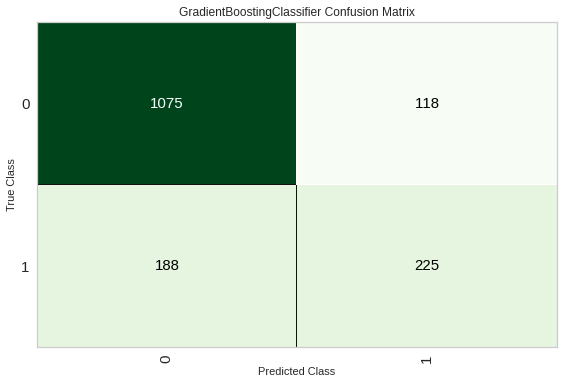

In [76]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

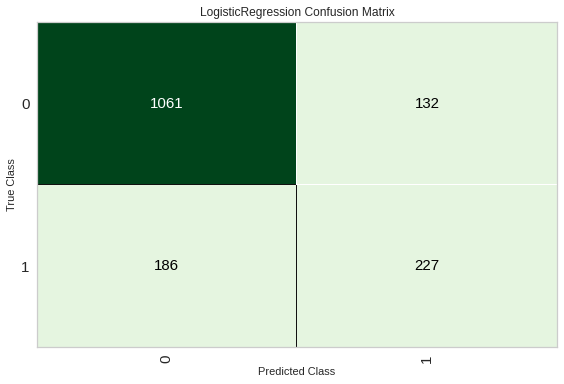

In [77]:
plot_model(tuned_lr, plot = 'confusion_matrix')

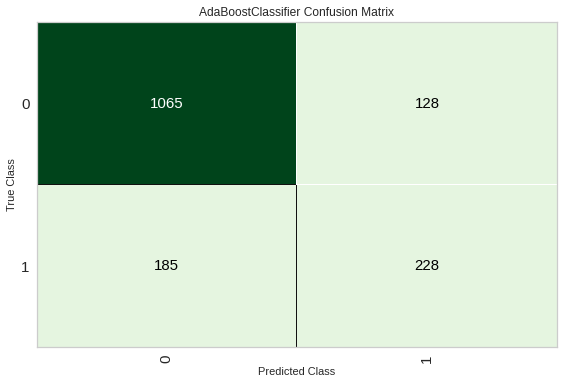

In [78]:
plot_model(tuned_ada, plot='confusion_matrix')

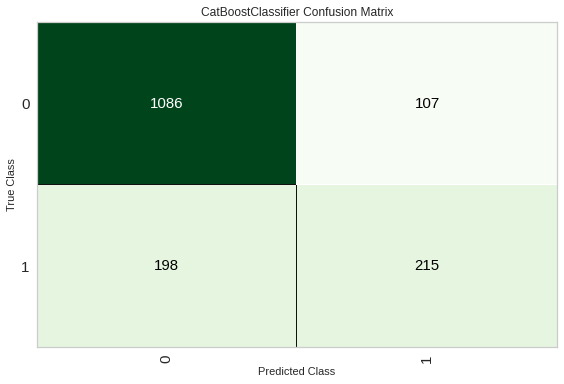

In [79]:
plot_model(tuned_catboost, plot='confusion_matrix')

In [88]:
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.81,0.84,0.54,0.66,0.60,0.47,0.48


In [91]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.80,0.84,0.55,0.63,0.59,0.46,0.46


In [93]:
predict_model(tuned_ada);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.81,0.84,0.55,0.64,0.59,0.47,0.47


In [94]:
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.81,0.84,0.52,0.67,0.58,0.46,0.47


In [89]:
final_gbc = finalize_model(tuned_gbc);

In [95]:
final_lr = finalize_model(tuned_lr);

In [97]:
final_ada = finalize_model(tuned_ada);

In [98]:
final_catboost = finalize_model(tuned_catboost);